 # SNAP Tutorial

Notebook tested with python 2.7. Small change might be neccessary for python 3.<BR>
Uses the following additional packes and software:<BR>
- gnuplot (http://www.gnuplot.info/)
- graphviz (https://www.graphviz.org/)
- powerlaw (https://github.com/jeffalstott/powerlaw)

In [6]:
# Test Instalation
status = False
try:
    import snap
    version = snap.Version
    i = snap.TInt(5)
    if i == 5:
        status = True
except:
    pass

if status:
    print ("SUCCESS, your version of Snap.py is %s" % (version))
else:
    print ("*** ERROR, no working Snap.py was found on your computer")

SUCCESS, your version of Snap.py is 5.0.0


In [7]:
import snap

### Basic Types

In [8]:
i= snap.TInt(10)
print (i.Val)

10


In [9]:
# Create an empty Vector
v = snap.TIntV()

# Add elements
v.Add(1) 
v.Add(2) 
v.Add(3) 
v.Add(4) 
v.Add(5)

# Print vector size
print( v.Len())

5


### Vector  Example

In [10]:
# Get and set element value
print (v[3])
v[3] = 2*v[2]
print (v[3])

4
6


In [11]:
#Print vector elements
for item in v: 
    print (item)


1
2
3
6
5


In [12]:
for i in range(0, v.Len()):
    print (i, v[i])

0 1
1 2
2 3
3 6
4 5


### Hash Table Example

In [13]:
# Create an empty table
h = snap.TIntStrH()

# Add elements
h[5] = "apple" 
h[3] = "tomato"
h[9] = "orange" 
h[6] = "banana" 
h[1] = "apricot"

In [14]:
# Print table size 
print (h.Len())

5


In [15]:
# Get element value
print ("h[3] =", h[3])

h[3] = tomato


In [16]:
# Set element value 
h[3] = "peach"
print ("h[3] =", h[3])

h[3] = peach


In [32]:
# Print table elements
for key in h:
    print (key, h[key])

5 apple
3 peach
9 orange
6 banana
1 apricot


### Pair Example

In [33]:
# Create a pair
p = snap.TIntStrPr(1,"one")

In [34]:
# Print pair values
print( p.GetVal1() )

1


In [35]:
print (p.GetVal2())

one


## Basic Graph and Network Classes

### Graph Creation

In [36]:
# Create a Directed Graph
G1 = snap.TNGraph.New()

# Add Nodes before 
G1.AddNode(1) 
G1.AddNode(5) 
G1.AddNode(12)

# adding edges
G1.AddEdge(1,5)
G1.AddEdge(5,1)
G1.AddEdge(5,12)

# Set node labels
NIdName = snap.TIntStrH() 
NIdName[1] = "1" 
NIdName[5] = "5" 
NIdName[12] = "12"

In [37]:
# Undirected graph, 
G2 = snap.TUNGraph.New()

# Directed network
N1 = snap.TNEANet.New()

## Drawing Graphs

Needs graphviz to be installed. See here https://www.graphviz.org/ <BR>
Use only for very **small** graphs

In [40]:
snap.DrawGViz(G1, snap.gvlDot, "G1.png", "G1", NIdName)

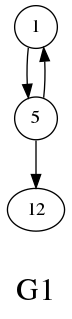

In [41]:
from IPython.display import Image
Image(filename='G1.png')

### Graph Traversal

In [42]:
# Node traversal
for NI in G1.Nodes():
    print ("node id %d, out-degree %d, in-degree %d" \
    % (NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()))

node id 1, out-degree 1, in-degree 1
node id 5, out-degree 2, in-degree 1
node id 12, out-degree 0, in-degree 1


In [43]:
# Edge traversal
for EI in G1.Edges():
    print ("(%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

(1, 5)
(5, 1)
(5, 12)


In [44]:
# Edge traversal by nodes
for NI in G1.Nodes():
    for DstNId in NI.GetOutEdges():
        print( "(%d %d)" % (NI.GetId(), DstNId))

(1 5)
(5 1)
(5 12)


### Graph Saving and Loading

In [45]:
# Save text
snap.SaveEdgeList(G1, "test.txt", "List of edges")



In [46]:
# Load text
G2 = snap.LoadEdgeList(snap.PNGraph,"test.txt",0,1)

__LoadEdgeList__(GraphType, InFNm, SrcColId, DstColId) <BR>
__Parameters__:
-  GraphType: graph class (input)<BR>
   Class of output graph – one of PNGraph, PNEANet, or PUNGraph.
-  InFNm: string (input)<BR>
   Filename with the description of the graph edges.
-  SrcColId: int (input)<BR>
   The column number in the file, which contains the node id representing the source vertex.
-  DstColId: int (input)<BR>
   The column number in the file, which contains the node id representing the destination vertex.

In [47]:
# Save Binary
FOut = snap.TFOut("test.graph") 
G2.Save(FOut)
FOut.Flush()

In [48]:
# Load Binary
FIn = snap.TFIn("test.graph")
G4 = snap.TNGraph.Load(FIn)

In [55]:
# wiki-Vote.txt
G5 = snap.LoadEdgeList(snap.PNGraph,"data/Wiki-Vote.txt",0,1)

### Plotting with Snap.py

Needs gnuplot to be installed. See here http://www.gnuplot.info/

In [60]:
# Graph of Java QA on StackOverflow:
G = snap.LoadEdgeList(snap.PNGraph, "data/qa.txt", 1, 5)

# Plot in-degree distribution 
snap.PlotInDegDistr(G, "Stack-Java", "Stack-Java In Degree")
# Plots are generated in files

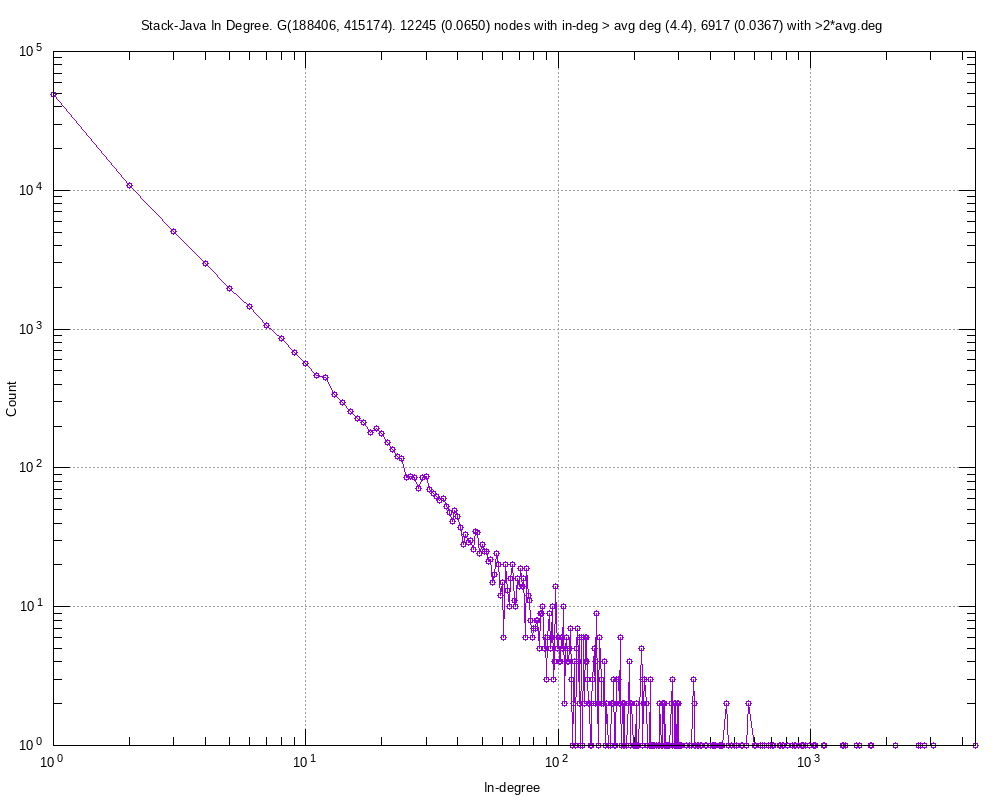

In [61]:
Image(filename='inDeg.Stack-Java.png')

In [62]:
snap.PlotInDegDistr(G5, "wiki_vote", "Wiki Vote In Degree")

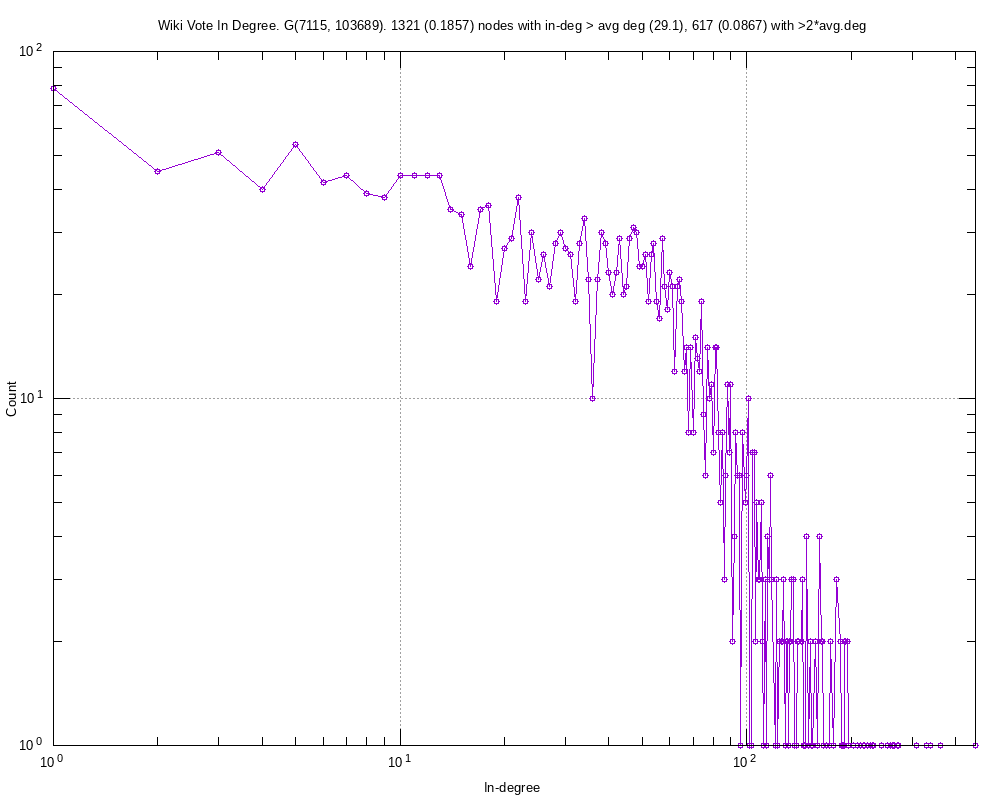

In [63]:
Image(filename='inDeg.wiki_vote.png')

In [64]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(G, InDegV)

numItemstoList=20;i=0;
for item in InDegV:
    print ("node ID %d: in-degree %d" % (item.GetVal1(), item.GetVal2()))
    i=i+1
    if i==numItemstoList:
        break # comment to output all nodes

node ID 78: in-degree 0
node ID 86: in-degree 5
node ID 58: in-degree 1
node ID 35: in-degree 3
node ID 122: in-degree 8
node ID 25: in-degree 0
node ID 154: in-degree 1
node ID 340: in-degree 1
node ID 40: in-degree 1
node ID 362: in-degree 0
node ID 432: in-degree 1
node ID 462: in-degree 8
node ID 2089740: in-degree 1
node ID 235: in-degree 21
node ID 13940: in-degree 8
node ID 488: in-degree 0
node ID 1741: in-degree 4
node ID 92: in-degree 6
node ID 287: in-degree 35
node ID 670: in-degree 0


## Powerlaw fit of degree Distribution

Source code and Windows installers of powerlaw package are available from the Python Package Index, PyPI, at https://pypi.python.org/pypi/powerlaw. It can be readily installed with pip:

`pip install powerlaw`

Source code is also available on GitHub at https://github.com/jeffalstott/powerlaw and Google Code at https://code.google.com/p/powerlaw/.

In [65]:
import powerlaw as pl
import numpy as np

In [66]:
a = np.arange(1, snap.CntNonZNodes(G) - snap.CntInDegNodes(G,0) +2)
i=0
for item in InDegV:
    if item.GetVal2() > 0 :
        i=i+1
        a[i]=item.GetVal2()

In [67]:
bars, bins=np.histogram(a,bins=np.arange(1,max(a)))

In [68]:
bars

array([48665, 10872,  5044, ...,     0,     0,     0])

In [69]:
bins

array([   1,    2,    3, ..., 4504, 4505, 4506])

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcParams['figure.figsize'] = [10, 7]

Text(0.5, 0, 'in-degree')

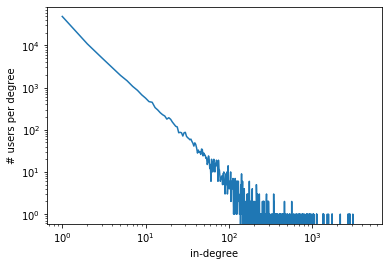

In [71]:
plt.loglog(bins[0:-1],bars)
plt.ylabel('# users per degree')
plt.xlabel('in-degree')

Text(0.5, 0, 'in-degree')

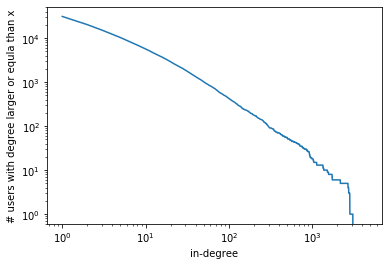

In [72]:
plt.loglog(bins[0:-1],sum(bars)-np.cumsum(bars))
plt.ylabel('# users with degree larger or equla than x')
plt.xlabel('in-degree')

In [73]:
fit=pl.Fit(a)

Calculating best minimal value for power law fit
/home/gabi/Installations/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


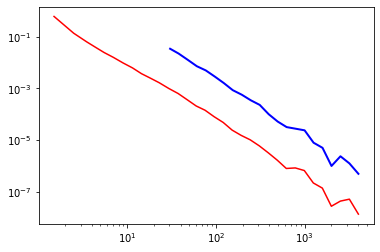

In [74]:
pl.plot_pdf(a, color='r')
fig2=fit.plot_pdf(color='b',linewidth=2)

In [75]:
# power-law exponent
fit.alpha

2.2571308697206742

In [76]:
# min value of x where power-law behaviour starts
fit.xmin

27.0

In [77]:
# result of Kolmogorov–Smirnov test
fit.D

0.018334616571345275

Text(0.5, 0, 'in-degree')

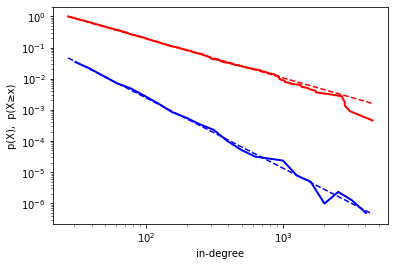

In [78]:
#comparison of data and Pl-fits of pdf (blue) and ccdf (red)"
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"in-degree")

# Network Analytics with SNAP

In [79]:
# Preferential Attachment
GPA = snap.GenPrefAttach(30, 3, snap.TRnd())

In [80]:
# Get an induced subgraph on a set of nodes NIdV:
NIdV = snap.TIntV()
for i in range(1,9): 
    NIdV.Add(i)
SubGPA = snap.GetSubGraph(GPA, NIdV)

### Print Graph Information

In [81]:
snap.PrintInfo(G, "QA Stats", "qa-info_basic.txt",  True) #if set to True only basic info is shown

In [82]:
f = open('qa-info_basic.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

QA Stats: Directed
  Nodes:                    188406
  Edges:                    415174
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         108618
  Zero OutDeg Nodes:        38319
  NonZero In-Out Deg Nodes: 41469



In [83]:
snap.PrintInfo(G, "QA Stats", "qa-info.txt",  False)

In [84]:
f = open('qa-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

QA Stats: Directed
  Nodes:                    188406
  Edges:                    415174
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         108618
  Zero OutDeg Nodes:        38319
  NonZero In-Out Deg Nodes: 41469
  Unique directed edges:    415174
  Unique undirected edges:  415027
  Self Edges:               26924
  BiDir Edges:              27218
  Closed triangles:         46992
  Open triangles:           69426319
  Frac. of closed triads:   0.000676
  Connected component size: 0.886745
  Strong conn. comp. size:  0.025758
  Approx. full diameter:    12
  90% effective diameter:  5.635083



In [85]:
snap.PrintInfo(G5, "Wiki Votes Stats", "wiki_votes-info.txt",  False)
f = open('wiki_votes-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes Stats: Directed
  Nodes:                    7115
  Edges:                    103689
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         4734
  Zero OutDeg Nodes:        1005
  NonZero In-Out Deg Nodes: 1376
  Unique directed edges:    103689
  Unique undirected edges:  100762
  Self Edges:               0
  BiDir Edges:              5854
  Closed triangles:         608389
  Open triangles:           12720413
  Frac. of closed triads:   0.045645
  Connected component size: 0.993113
  Strong conn. comp. size:  0.182713
  Approx. full diameter:    7
  90% effective diameter:  3.779240



### Connected Components

In [87]:
# Get largest WCC
MxWcc = snap.GetMxWcc(G5)
print( "max wcc nodes %d, edges %d" % \
    (MxWcc.GetNodes(), MxWcc.GetEdges()))

max wcc nodes 7066, edges 103663


In [89]:
# Get WCC sizes
WccV = snap.TIntPrV()
snap.GetWccSzCnt(G5, WccV)

print ("# of connected component sizes", WccV.Len() )
for comp in WccV:
    print ("size %d, number of components %d" % \
        (comp.GetVal1(), comp.GetVal2()))

# of connected component sizes 3
size 2, number of components 20
size 3, number of components 3
size 7066, number of components 1


In [90]:
snap.PrintInfo(MxWcc, "Wiki Votes Stats", "wiki_votes-infoMxWcc.txt",  False)
f = open('wiki_votes-infoMxWcc.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes Stats: Directed
  Nodes:                    7066
  Edges:                    103663
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         4708
  Zero OutDeg Nodes:        982
  NonZero In-Out Deg Nodes: 1376
  Unique directed edges:    103663
  Unique undirected edges:  100736
  Self Edges:               0
  BiDir Edges:              5854
  Closed triangles:         608389
  Open triangles:           12720410
  Frac. of closed triads:   0.045645
  Connected component size: 1.000000
  Strong conn. comp. size:  0.183980
  Approx. full diameter:    6
  90% effective diameter:  3.782779



In [95]:
MxScc = snap.GetMxScc(G5) #Returns a graph representing the largest strongly connected component in Graph.
print ("max scc nodes %d, edges %d" % \
    (MxScc.GetNodes(), MxScc.GetEdges()))

max scc nodes 1300, edges 39456


In [93]:
# Get SCC sizes
SccV = snap.TIntPrV()
snap.GetSccSzCnt(G5, WccV)

print ("# of connected component sizes", WccV.Len() )
for comp in WccV:
    print ("size %d, number of components %d" % \
        (comp.GetVal1(), comp.GetVal2()))

# of connected component sizes 2
size 1, number of components 5815
size 1300, number of components 1


In [94]:
snap.PrintInfo(MxScc, "Wiki Votes Stats", "wiki_votes-infoMxScc.txt",  False)
f = open('wiki_votes-infoMxScc.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes Stats: Directed
  Nodes:                    1300
  Edges:                    39456
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 1300
  Unique directed edges:    39456
  Unique undirected edges:  36529
  Self Edges:               0
  BiDir Edges:              5854
  Closed triangles:         254312
  Open triangles:           3145182
  Frac. of closed triads:   0.074809
  Connected component size: 1.000000
  Strong conn. comp. size:  1.000000
  Approx. full diameter:    4
  90% effective diameter:  2.614085



### Analyze node connectivity

In [96]:
# Get node with max degree
NId = snap.GetMxDegNId(GPA) 
print ("max degree node", NId)

# Get degree distribution
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(GPA, DegToCntV)
for item in DegToCntV:
    print ("%d nodes with degree %d" % (
        item.GetVal2(), item.GetVal1()))

max degree node 3
11 nodes with degree 3
9 nodes with degree 4
1 nodes with degree 6
1 nodes with degree 7
2 nodes with degree 8
1 nodes with degree 9
1 nodes with degree 10
2 nodes with degree 11
1 nodes with degree 13
1 nodes with degree 16


### Node Centrality



In [97]:
# Calculate node PageRank scores
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)

# Print them out
numItemstoList=20;
i=0;
for item in PRankH:
    print (item, PRankH[item])
    i=i+1
    if i==numItemstoList:
        break # uncomment to output all nodes

78 1.8704397870435743e-06
86 8.507503670877727e-06
58 2.1289669943040223e-06
35 1.5029251112027098e-05
122 3.496811077569971e-05
25 1.8704397870435743e-06
154 3.4603720240671355e-06
340 1.9828027939408653e-06
40 2.111217658966341e-06
362 1.8704397870435743e-06
432 3.4603720240671355e-06
462 1.2669008555821948e-05
2089740 1.2639803998519903e-05
235 2.2135761614937025e-05
13940 2.9294336771629678e-05
488 1.8704397870435743e-06
1741 4.083967848159381e-06
92 8.493473780750819e-06
287 5.115894325668671e-05
670 1.8704397870435743e-06


In [98]:
# sort them
sorted_PRankH = sorted(PRankH, key = lambda key: PRankH[key],
 reverse = True)

In [99]:
# print top n nodes with highest Pagerank
for item in sorted_PRankH[0:10]:
    print (item, PRankH[item])

22656 0.007056128768176306
139985 0.00529019813391255
571407 0.004347854326106056
992484 0.0037221286179404257
157882 0.003628119980262345
57695 0.0035063760957813597
218978 0.0031601008461727615
70604 0.003069730739319889
230513 0.002948376314400641
438154 0.0025064472665334097


### Triads and Clsutering Coefficient

In [100]:
# Count triads
Triads = snap.GetTriads(G5)
print ("triads", Triads)

# Calculate clustering coefficient
CC = snap.GetClustCf(G5)
print ("clustering coefficient", CC)

triads 608389
clustering coefficient 0.14089784589308724


### Distances between nodes


In [101]:
# Calculate diameter
D = snap.GetBfsFullDiam(G5, 7000)
print ("diameter", D)

# Calculate effective diameter
ED = snap.GetBfsEffDiam(G5, 7000) 
print ("effective diameter", ED)

diameter 7
effective diameter 3.776224059386249


**GetBfsEffDiamAll**(Graph, NTestNode, IsDir)<BR>
Returns the approximation of the effective diameter, the diameter, and the average shortest path length in a graph. Does this by performing BFS from NTestNodes random starting nodes.

**Parameters:**
- Graph: graph (input)
        A Snap.py graph or a network.
- NTestNodes: int (input)
        The number of random start nodes to use in the BFS used to calculate the graph diameter and effective diameter.

- IsDir: bool (input)
        Indicates whether the edges should be considered directed or undirected.

**Return value:**
    list: [ float, float, int, float ]<BR>
    The list contains four elements: 
    1. the first and the second element are the effective diameter of the graph, 
    3. the third element is the diameter
    4. the fourth element is the average shortest path length.

In [102]:
#Difference between directed and undirected
result = snap.GetBfsEffDiamAll(G5, 1000, False) 
print (result)

[3.7836043105163135, 3.7836043105163135, 7, 3.258658724292534]


In [103]:
result = snap.GetBfsEffDiamAll(G5, 1000, True)
print (result)

[3.9714007931431494, 3.9714007931431494, 8, 3.356699931312059]


In [104]:
#calculate avverage distance
NIdToDistH = snap.TIntH()
# Node traversal
distL=[]
i=0
MxSccG5 = snap.GetMxScc(G5)
numNodes=MxSccG5.GetNodes()
dmN=np.zeros(numNodes)
IsDir = True

for NI in MxSccG5.Nodes():
    i=i+1;
    if (i% 100) ==0:
        print ("node %d, of %d" \
        % (i, numNodes))
    shortestPath = snap.GetShortPath(MxSccG5, NI.GetId(), NIdToDistH, IsDir)
    temp=[]
    for item in NIdToDistH:
        if NIdToDistH[item] > 0:
            distL.append(NIdToDistH[item])
            temp.append(NIdToDistH[item])
    dmN[i-1]=np.mean(temp)        

node 100, of 1300
node 200, of 1300
node 300, of 1300
node 400, of 1300
node 500, of 1300
node 600, of 1300
node 700, of 1300
node 800, of 1300
node 900, of 1300
node 1000, of 1300
node 1100, of 1300
node 1200, of 1300
node 1300, of 1300


In [105]:
# Calculate diameter
D = snap.GetBfsFullDiam(MxSccG5, 1300, IsDir)
print ("diameter", D)

# Calculate effective diameter
ED = snap.GetBfsEffDiam(MxSccG5, 1300, IsDir) 
print ("effective diameter", ED)

diameter 9
effective diameter 3.578109948154001


In [106]:
distV=np.asarray(distL)
np.mean(distV)

2.8792828803221413

In [107]:
numNodes

1300

In [108]:
np.mean(dmN)

2.8792828803221417

In [109]:
np.percentile(distV,90)

4.0

In [110]:
np.percentile(dmN,90)

3.6206312548113933

In [111]:
IsDir = True
snap.GetBfsEffDiam(MxSccG5, 7000, IsDir)

3.578109948154001

In [112]:
result = snap.GetBfsEffDiamAll(MxSccG5, 1000, True)
print (result)

[3.5552963722947073, 3.5552963722947073, 9, 2.858976153846154]


## K-cores

In [113]:
Core3 = snap.GetKCore(G5, 3)  # Calculate 3-core
# Returns the subgraph  

In [114]:
K=0
while True:
    K=K+1
    KCore = snap.GetKCore(G5, K)
    if KCore.Empty():
        print ('No Core exists for K=%d' % K)
        break
    else:
        print( 'Core exists for K=%d' % K)

Core exists for K=1
Core exists for K=2
Core exists for K=3
Core exists for K=4
Core exists for K=5
Core exists for K=6
Core exists for K=7
Core exists for K=8
Core exists for K=9
Core exists for K=10
Core exists for K=11
Core exists for K=12
Core exists for K=13
Core exists for K=14
Core exists for K=15
Core exists for K=16
Core exists for K=17
Core exists for K=18
Core exists for K=19
Core exists for K=20
Core exists for K=21
Core exists for K=22
Core exists for K=23
Core exists for K=24
Core exists for K=25
Core exists for K=26
Core exists for K=27
Core exists for K=28
Core exists for K=29
Core exists for K=30
Core exists for K=31
Core exists for K=32
Core exists for K=33
Core exists for K=34
Core exists for K=35
Core exists for K=36
Core exists for K=37
Core exists for K=38
Core exists for K=39
Core exists for K=40
Core exists for K=41
Core exists for K=42
Core exists for K=43
Core exists for K=44
Core exists for K=45
Core exists for K=46
Core exists for K=47
Core exists for K=48
C

In [115]:
# Calcualte the number of nodes in every core
CoreIDSzV = snap.TIntPrV()
kValue = snap.GetKCoreNodes(G5, CoreIDSzV)
for item in CoreIDSzV:
    print ("k-core: %d nodes: %d" % (item.GetVal1(), item.GetVal2()))

k-core: 0 nodes: 7115
k-core: 1 nodes: 7115
k-core: 2 nodes: 4786
k-core: 3 nodes: 4153
k-core: 4 nodes: 3762
k-core: 5 nodes: 3513
k-core: 6 nodes: 3343
k-core: 7 nodes: 3183
k-core: 8 nodes: 3030
k-core: 9 nodes: 2913
k-core: 10 nodes: 2825
k-core: 11 nodes: 2711
k-core: 12 nodes: 2605
k-core: 13 nodes: 2529
k-core: 14 nodes: 2452
k-core: 15 nodes: 2383
k-core: 16 nodes: 2319
k-core: 17 nodes: 2268
k-core: 18 nodes: 2214
k-core: 19 nodes: 2146
k-core: 20 nodes: 2099
k-core: 21 nodes: 2065
k-core: 22 nodes: 2011
k-core: 23 nodes: 1979
k-core: 24 nodes: 1926
k-core: 25 nodes: 1876
k-core: 26 nodes: 1830
k-core: 27 nodes: 1780
k-core: 28 nodes: 1754
k-core: 29 nodes: 1708
k-core: 30 nodes: 1673
k-core: 31 nodes: 1625
k-core: 32 nodes: 1584
k-core: 33 nodes: 1534
k-core: 34 nodes: 1482
k-core: 35 nodes: 1433
k-core: 36 nodes: 1377
k-core: 37 nodes: 1337
k-core: 38 nodes: 1305
k-core: 39 nodes: 1250
k-core: 40 nodes: 1217
k-core: 41 nodes: 1155
k-core: 42 nodes: 1084
k-core: 43 nodes: 104

### Transform directed Graph into undirected

In [116]:
G5Un = snap.ConvertGraph(snap.PUNGraph, G5)
snap.PrintInfo(G5Un, "Wiki Votes UN Stats", "wiki_votesUN-info.txt",  False)

In [117]:
f = open('wiki_votesUN-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes UN Stats:
  Nodes:                    7115
  Edges:                    100762
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 7115
  Unique directed edges:    201524
  Unique undirected edges:  100762
  Self Edges:               0
  BiDir Edges:              201524
  Closed triangles:         608389
  Open triangles:           12720413
  Frac. of closed triads:   0.045645
  Connected component size: 0.993113
  Strong conn. comp. size:  0.993113
  Approx. full diameter:    6
  90% effective diameter:  3.788046



## Generate Artificial Graphs

In [118]:
AverageDegree=G5Un.GetEdges()/G5Un.GetNodes() #truncated average degree
AverageDegreeF=G5Un.GetEdges()/float(G5Un.GetNodes())
print(AverageDegree)
print(AverageDegreeF)

14.161911454673225
14.161911454673225


In [125]:
# Preferential Attachment
Rnd = snap.TRnd()
G5PRefAttach = snap.GenPrefAttach(G5Un.GetNodes(), int(AverageDegree), Rnd)
snap.PrintInfo(G5PRefAttach, "Wiki Votes PA Stats", "wiki_votesPA-info.txt",  False)

In [126]:
f = open('wiki_votesPA-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes PA Stats:
  Nodes:                    7115
  Edges:                    99505
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 7115
  Unique directed edges:    199010
  Unique undirected edges:  99505
  Self Edges:               0
  BiDir Edges:              199010
  Closed triangles:         36418
  Open triangles:           6035115
  Frac. of closed triads:   0.005998
  Connected component size: 1.000000
  Strong conn. comp. size:  1.000000
  Approx. full diameter:    4
  90% effective diameter:  2.886225



In [127]:
# Configuration Model
G5UnDegSeqV = snap.TIntV()
snap.GetDegSeqV(G5Un, G5UnDegSeqV)

Rnd = snap.TRnd()
G5ConfModel = snap.GenConfModel(G5UnDegSeqV, Rnd)
snap.PrintInfo(G5ConfModel, "Wiki Votes ConfModel Stats", "wiki_votesConfModel-info.txt",  False)

In [128]:
f = open('wiki_votesConfModel-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes ConfModel Stats:
  Nodes:                    7115
  Edges:                    96163
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 7115
  Unique directed edges:    192326
  Unique undirected edges:  96163
  Self Edges:               0
  BiDir Edges:              192326
  Closed triangles:         300978
  Open triangles:           11199598
  Frac. of closed triads:   0.026171
  Connected component size: 0.998313
  Strong conn. comp. size:  0.998313
  Approx. full diameter:    6
  90% effective diameter:  3.731772



In [129]:
# Node Rewiring
Rnd = snap.TRnd()
G5RW = snap.GenRewire(G5Un, 1000, Rnd)

In [130]:
snap.PrintInfo(G5RW, "Wiki Votes Rewire Stats", "wiki_votesRewire-info.txt",  False)

In [131]:
f = open('wiki_votesRewire-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes Rewire Stats:
  Nodes:                    7115
  Edges:                    100762
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 7115
  Unique directed edges:    201524
  Unique undirected edges:  100762
  Self Edges:               0
  BiDir Edges:              201524
  Closed triangles:         397085
  Open triangles:           13354325
  Frac. of closed triads:   0.028876
  Connected component size: 0.998313
  Strong conn. comp. size:  0.998313
  Approx. full diameter:    7
  90% effective diameter:  3.742381



In [132]:
# Erdos-Renyi random graph
G5ER = snap.GenRndGnm(snap.PNGraph, G5.GetNodes(),G5.GetEdges())
snap.PrintInfo(G5ER, "Wiki Votes Random Stats", "wiki_votesRandom-info.txt",  False)

In [133]:
G5Un.GetEdges()

100762

In [134]:
f = open('wiki_votesRandom-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Wiki Votes Random Stats: Directed
  Nodes:                    7115
  Edges:                    103689
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 7115
  Unique directed edges:    103689
  Unique undirected edges:  103588
  Self Edges:               0
  BiDir Edges:              202
  Closed triangles:         4139
  Open triangles:           3003069
  Frac. of closed triads:   0.001376
  Connected component size: 1.000000
  Strong conn. comp. size:  1.000000
  Approx. full diameter:    4
  90% effective diameter:  2.928643



__Task__: Calculate k-cores and plot degree disitributions for G5ER and G5PRefAttach. Compare with original data.